## Andres Felipe Rincon Prieto

## Image compresion

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from scipy.linalg import svd
from skimage import io
from PIL import Image
import numpy as np
import time
import os
plt.rcParams["figure.figsize"]=[16,8]

## Singular Value Descomposition - definition

$$A=U \Sigma V^{*}$$

A - original matrix (dimensions:(m rows, n columns -m,n))

U - unitary matrix

$\Sigma$ - rectangular diagonal matrix of singular values

$V^{*}$ - Unitary matrix

A prerequisite:

$ \quad m \geq n $

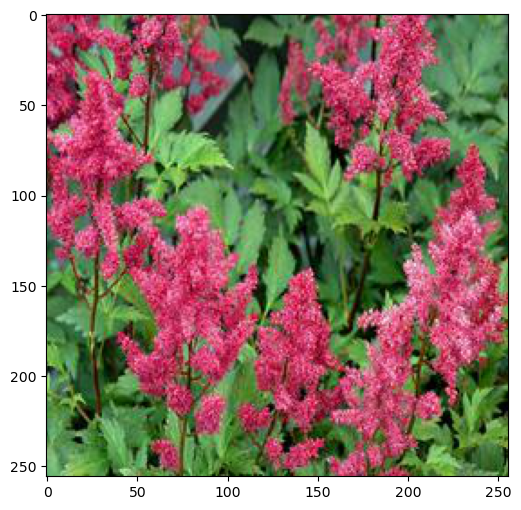

In [2]:
img = Image.open('../Computational_linear_algebra/flowers/astilbe/22085360_5eb0196960_c.jpg')
#imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(img)

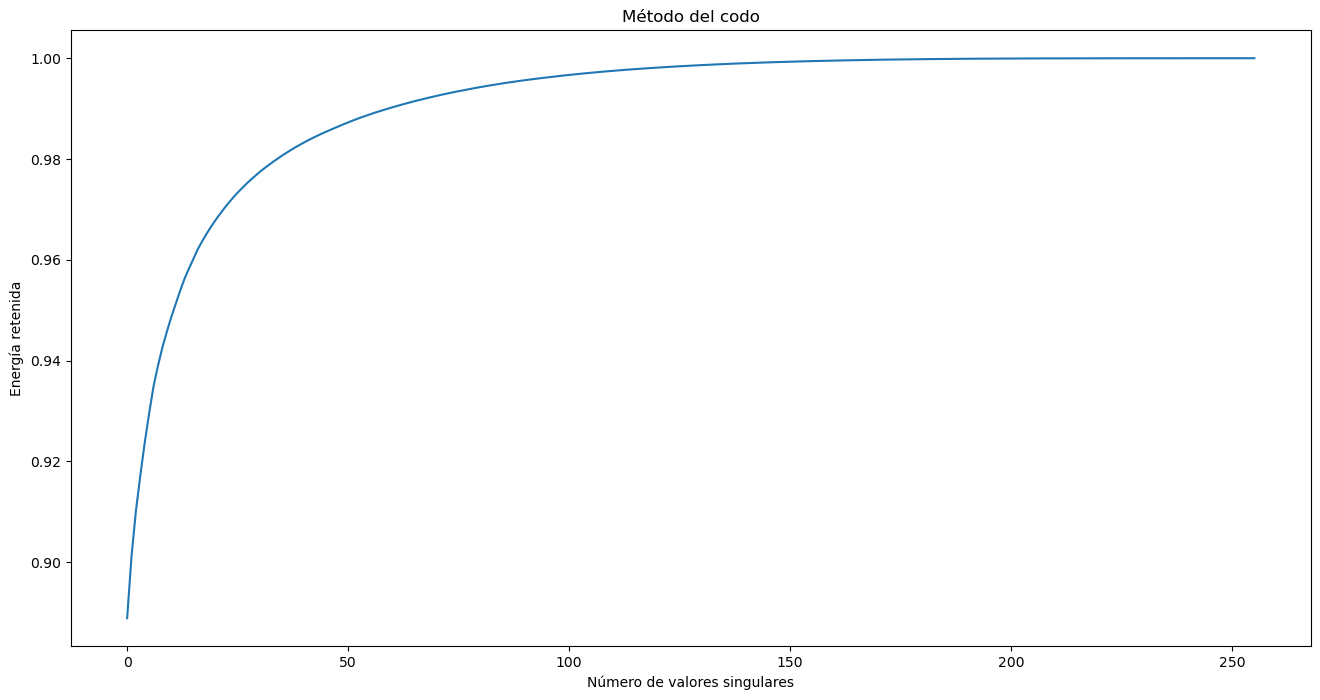

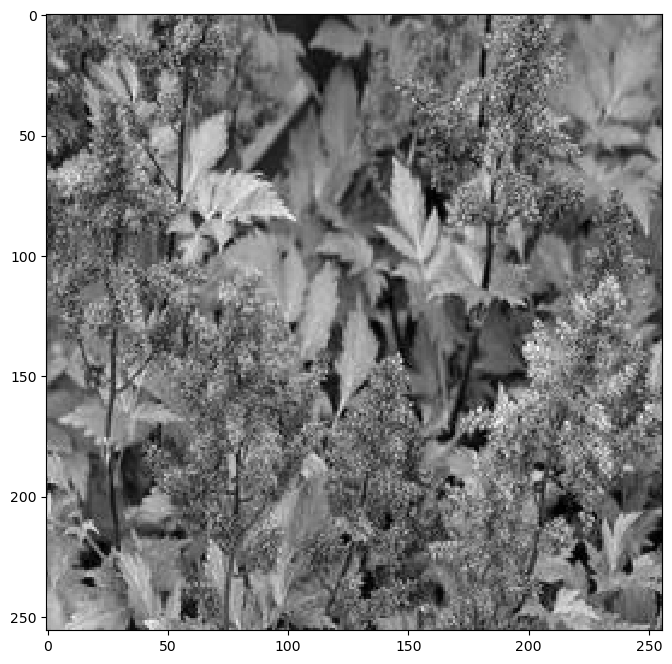

In [3]:

# Load the image
img = io.imread('../Computational_linear_algebra/flowers/astilbe/22085360_5eb0196960_c.jpg', as_gray=True)
# Realizar la descomposición SVD
U, S, V = svd(img)
# Calcular la cantidad de energía retenida por cada valor singular
energy = (S ** 2) / (S ** 2).sum()

# Graficar la cantidad de energía retenida en función del número de valores singulares
plt.plot(np.cumsum(energy))
plt.xlabel('Número de valores singulares')
plt.ylabel('Energía retenida')
plt.title('Método del codo')
plt.show()
#En este código, se utiliza la función svd de Scipy para realizar la descomposición SVD de la imagen. Luego, se calcula la cantidad de energía retenida por cada valor singular dividiendo cada valor singular al cuadrado por la suma de todos los valores singulares al cuadrado. Finalmente, se grafica la cantidad de energía retenida en función del número de valores singulares y se busca el "codo" en el gráfico para seleccionar el número óptimo de valores singulares para la compresión.


plt.imshow(img, interpolation = "none", cmap = "gray")
plt.show()



In [6]:


# open the image and return 3 matrices, each corresponding to one channel (R, G and B channels)
def get_color_matrices(imagePath):
    original_image = Image.open(imagePath)
    img_array = np.array(original_image)
    array_red = img_array[:, :, 0]
    array_green = img_array[:, :, 1]
    array_blue = img_array[:, :, 2]
    return [array_red , array_green, array_blue, original_image]


# compress the matrix of a single channel
def compressSingleChannel(channelDataMatrix,list_porcentages):
    U, S, V = np.linalg.svd(channelDataMatrix)
    diagonal=np.diagflat(S)
    energy = (S ** 2) / (S ** 2).sum()
    cum_energy=np.cumsum(energy)
    index_values=np.searchsorted(cum_energy, list_porcentages)
    matrix_colors=[]
    dimension=[]
    for k in index_values:
        aChannelCompressed=U[:,:k] @ diagonal[:k,:k] @ V[:k,:]
        aChannelCompressed=aChannelCompressed.astype("uint8")
        matrix_colors.append(aChannelCompressed)
        dimension.append(k)
    return matrix_colors,dimension



array_red, array_green, array_blue, originalImage = get_color_matrices('../Computational_linear_algebra/flowers/astilbe/22085360_5eb0196960_c.jpg')


# number of singular values to use for reconstructing the compressed image
list_porcentages=[0.75,0.9,0.95,0.99,0.9999]

aRedCompressed,index_red = compressSingleChannel(array_red,list_porcentages)
aGreenCompressed,index_green = compressSingleChannel(array_green,list_porcentages)
aBlueCompressed,index_blue = compressSingleChannel(array_blue,list_porcentages)
list_porcentages=[0.75,0.9,0.95,0.99,0.9999]
for index_matrix in range(len(aRedCompressed)):
    imr = Image.fromarray(aRedCompressed[index_matrix], mode=None)
    img = Image.fromarray(aGreenCompressed[index_matrix], mode=None)
    imb = Image.fromarray(aBlueCompressed[index_matrix], mode=None)
    newImage = Image.merge("RGB", (imr, img, imb))
    new_dir = "C:/Users/afrincon/OneDrive - Asesoftware S.A.S/Documentos/computational_linear_algebra/Imagenes_comprimidas"
    os.chdir(new_dir)
    #originalImage.show()
    #newImage.show()
    newImage.save("result.jpg")


